## Modelo de Árbol de decisiones para predecir la calidad del vino

In [173]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Cargar el data set para analizarlo y ajustarlo
df = pd.read_csv('./winequality-red.csv')

In [5]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Hay 12 variables
fixed acidity (acidez fija), volatile acidity (Acidez volátil), citric acid (ácido cítrico), residual sugar (Azúcar residual), chlorides (cloruros), free sulfur dioxide (Dióxido de azufre libre), total sulfur dioxide (Dióxido de azufre total), density (densidad), pH (pH), sulphates (sulfatos), alcohol (alcohol) y quality (calidad).


In [8]:
# Estadísticas descriptivas de variables numéricas
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
# Información sobre tipos de datos y valores no nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


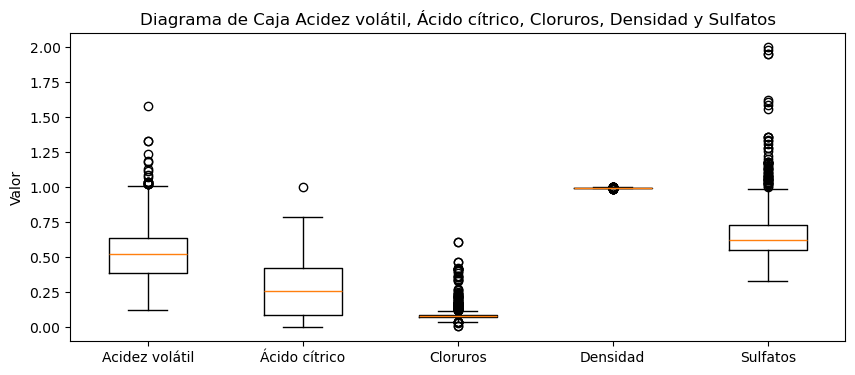

In [36]:
#Identificación de Datos Faltantes (No hay) y Atípicos
# Diagramas de caja para detectar valores atípicos variables entre 0 y 2
plt.figure(figsize=(10, 4))
plt.boxplot([df['volatile acidity'], df['citric acid'], df['chlorides'], df['density'], df['sulphates']], 
        labels=['Acidez volátil', 'Ácido cítrico', 'Cloruros', 'Densidad', 'Sulfatos'])
plt.ylabel('Valor')
plt.title('Diagrama de Caja Acidez volátil, Ácido cítrico, Cloruros, Densidad y Sulfatos')
plt.show()

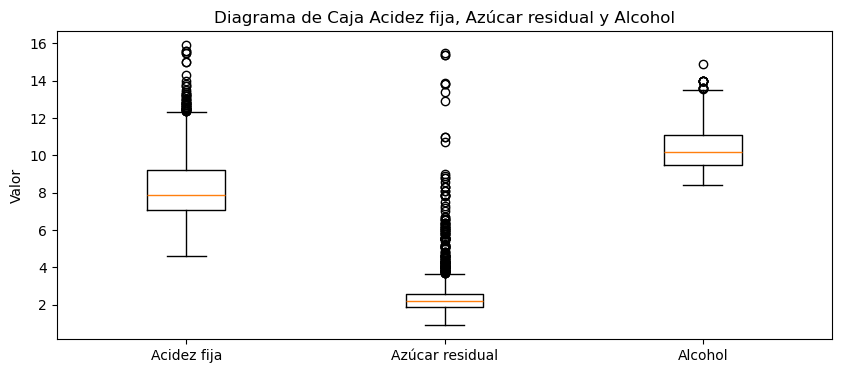

In [34]:
#Identificación de Datos Faltantes (No hay) y Atípicos
# Diagramas de caja para detectar valores atípicos para variables entre 0 y 16
plt.figure(figsize=(10, 4))
plt.boxplot([df['fixed acidity'], df['residual sugar'], df['alcohol']], 
        labels=['Acidez fija', 'Azúcar residual', 'Alcohol'])
plt.ylabel('Valor')
plt.title('Diagrama de Caja Acidez fija, Azúcar residual y Alcohol')
plt.show()

Los posibles valores atípicos son normales y difenciales entre clases de vinos 

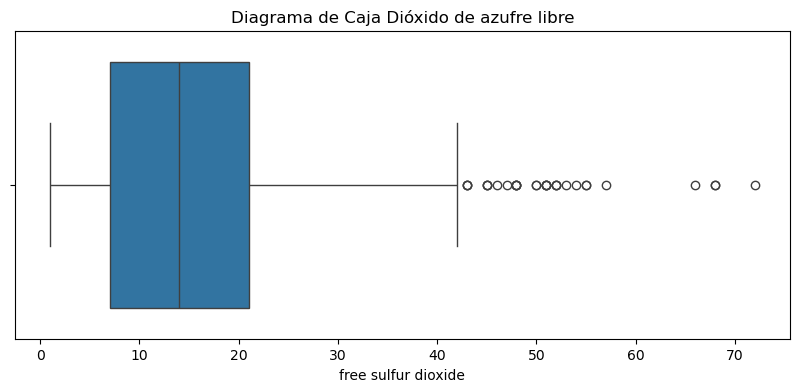

In [38]:
# Diagramas de caja para detectar valores atípicos
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['free sulfur dioxide'])
plt.title('Diagrama de Caja Dióxido de azufre libre')
plt.show()

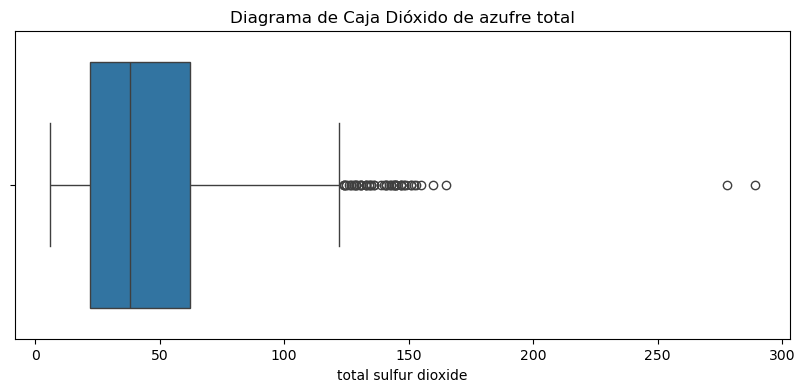

In [40]:
# Diagramas de caja para detectar valores atípicos
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['total sulfur dioxide'])
plt.title('Diagrama de Caja Dióxido de azufre total')
plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [42]:
# Verificar valores faltantes en el DataFrame
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [44]:
# Se verifica la existencia de registros duplicados
print(f' Cantidad de registros duplicados es: ', df.duplicated().sum())

 Cantidad de registros duplicados es:  240


In [61]:
# Se eliminan las observaciones ducplicadas
df_unicos = df.drop_duplicates()

In [79]:
# Se verifica la eliminación de los valores duplicados
print(f' Cantidad de registros original: {len(df)} \n Cantidad de registros actuales: {len(df_unicos)} \n Cantidad de Registros eliminados: {(len(df)-len(df_unicos))}')

 Cantidad de registros original: 1599 
 Cantidad de registros actuales: 1359 
 Cantidad de Registros eliminados: 240


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

En este caso de estudio, la variable Quality define la calidad del vino, por lo cual es la variable dependiente.

Las demás variables (11) aportan información valiosa para el entrenamiento y están aptas para iniciar el modelado

In [86]:
df_unicos['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [212]:
# Primer Modelo (train) = 75%, (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = df_unicos.drop('quality',axis=1) # Datos sin variable dependiente  
Y = df_unicos['quality'] # Datos variable dependiente

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)


In [90]:
# Observamos los datos de entrenamiento variables independientes (75%)
print(X_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
617            11.5              0.31         0.51             2.2      0.079   
663            10.1              0.28         0.46             1.8      0.050   
942            10.1              0.43         0.40             2.6      0.092   
106             7.8              0.41         0.68             1.7      0.467   
774             7.9              0.40         0.30             1.8      0.157   
...             ...               ...          ...             ...        ...   
1323            9.1              0.36         0.39             1.8      0.060   
906             7.2              0.54         0.27             2.6      0.084   
268             6.9              0.54         0.04             3.0      0.077   
127             8.1              1.33         0.00             1.8      0.082   
432            11.9              0.37         0.69             2.3      0.078   

      free sulfur dioxide  

In [214]:
# Observamos los datos de entrenamiento variable dependientes (25%)
print(Y_train)

617     6
663     6
942     7
106     5
774     6
       ..
1323    7
906     5
268     6
127     5
432     6
Name: quality, Length: 1019, dtype: int64


## 5. Entrenamiento del modelo de Árbol de Decisiones

In [216]:
# Construir el modelo de regresión logística 

modelo = DecisionTreeClassifier() # Se crea el modelo

# Se entrena con los datos destinados
modelo.fit (X_train , Y_train)   

# Crea el modelo de prediccion con los datos de test
prediccion = modelo.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación


In [218]:
# Verifico las predicciones
print(prediccion)

[5 5 5 5 6 6 5 6 7 6 6 7 6 6 6 6 6 7 7 6 5 6 5 7 7 5 5 7 5 5 6 6 5 5 6 5 5
 5 6 6 6 5 5 5 5 6 5 5 6 5 5 5 5 5 6 5 5 7 5 5 6 5 6 6 6 6 5 5 5 6 5 6 5 7
 5 6 6 7 5 6 4 7 6 7 6 6 7 6 5 6 6 7 5 8 8 5 5 5 5 5 5 6 5 5 7 6 5 6 5 5 4
 6 5 6 5 5 6 5 4 5 5 6 7 6 5 6 6 5 7 7 6 7 6 6 4 6 6 5 6 5 6 6 5 6 5 5 4 5
 6 6 6 7 5 5 5 5 5 6 6 6 6 7 6 5 5 6 5 5 5 5 6 6 6 6 5 5 5 5 6 7 5 5 7 6 5
 6 4 6 5 5 5 6 7 5 6 6 5 7 5 5 5 5 5 4 6 5 5 6 6 5 4 6 5 5 7 5 7 5 6 6 6 6
 7 6 6 6 6 6 6 5 7 5 5 7 6 6 8 7 5 5 6 7 5 6 5 4 8 6 5 6 5 6 5 7 7 6 5 6 6
 6 4 6 5 6 6 7 6 5 6 5 7 5 6 7 6 7 5 6 7 5 5 4 4 6 5 5 5 5 5 7 6 5 5 5 4 5
 5 5 6 5 4 6 6 6 4 4 7 7 7 5 4 5 4 5 5 5 7 6 5 5 5 6 7 5 6 6 5 5 6 7 5 5 5
 5 5 7 6 6 6 6]


## 6 Evaluación del modelo de regresion creado

In [220]:
# Desempeño del modelo de arbol de decisiones

accuracy = accuracy_score(Y_test, prediccion)
print(f'Precisión del modelo: {accuracy}')

class_report = classification_report(Y_test, prediccion)
print("Reporte de clasificación:")
print(class_report)


Precisión del modelo: 0.5294117647058824
Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.22      0.31      0.26        13
           5       0.67      0.68      0.67       144
           6       0.52      0.48      0.50       134
           7       0.30      0.33      0.31        42
           8       0.00      0.00      0.00         4

    accuracy                           0.53       340
   macro avg       0.28      0.30      0.29       340
weighted avg       0.53      0.53      0.53       340



C:\Users\GABRIEL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\GABRIEL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\GABRIEL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [222]:
# Segundo Modelo (train) = 75%, (test) = 25%
# Modelo RandomForestClassifier

# Construir el modelo de regresión logística 

modelo2 = RandomForestClassifier(n_estimators=100) # 

# Se entrena con los datos destinados
modelo2.fit (X_train , Y_train)   

# Crea el modelo de prediccion con los datos de test
prediccion2 = modelo2.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

# Desempeño del modelo de regresión

accuracy = accuracy_score(Y_test, prediccion2)
print(f'Precisión del modelo: {accuracy}')

class_report = classification_report(Y_test, prediccion2)
print("Reporte de clasificación:")
print(class_report)

Precisión del modelo: 0.6
Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.66      0.74      0.70       144
           6       0.55      0.63      0.59       134
           7       0.48      0.29      0.36        42
           8       0.00      0.00      0.00         4

    accuracy                           0.60       340
   macro avg       0.28      0.28      0.28       340
weighted avg       0.56      0.60      0.57       340



C:\Users\GABRIEL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\GABRIEL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\GABRIEL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [228]:
# Tercer Modelo (train) = 80%, (test) = 20%

# Modelo RandomForestClassifier

# Se crean variables X y Y para almacenar la información del entrenamiento

X = df_unicos.drop('quality',axis=1) # Datos sin variable dependiente  
Y = df_unicos['quality'] # Datos variable dependiente

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state= 0)

# Construir el modelo de regresión logística 

modelo3 = RandomForestClassifier(n_estimators=100) # 

# Se entrena con los datos destinados
modelo3.fit (X_train , Y_train)   

# Crea el modelo de prediccion con los datos de test
prediccion3 = modelo3.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

# Desempeño del modelo de regresión

accuracy = accuracy_score(Y_test, prediccion3)
print(f'Precisión del modelo: {accuracy}')

class_report = classification_report(Y_test, prediccion3)
print("Reporte de clasificación:")
print(class_report)

Precisión del modelo: 0.6544117647058824
Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.79      0.75       116
           6       0.61      0.70      0.66       107
           7       0.50      0.33      0.40        33
           8       0.00      0.00      0.00         3

    accuracy                           0.65       272
   macro avg       0.31      0.30      0.30       272
weighted avg       0.61      0.65      0.63       272



C:\Users\GABRIEL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\GABRIEL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\GABRIEL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 7 Graficas del modelo

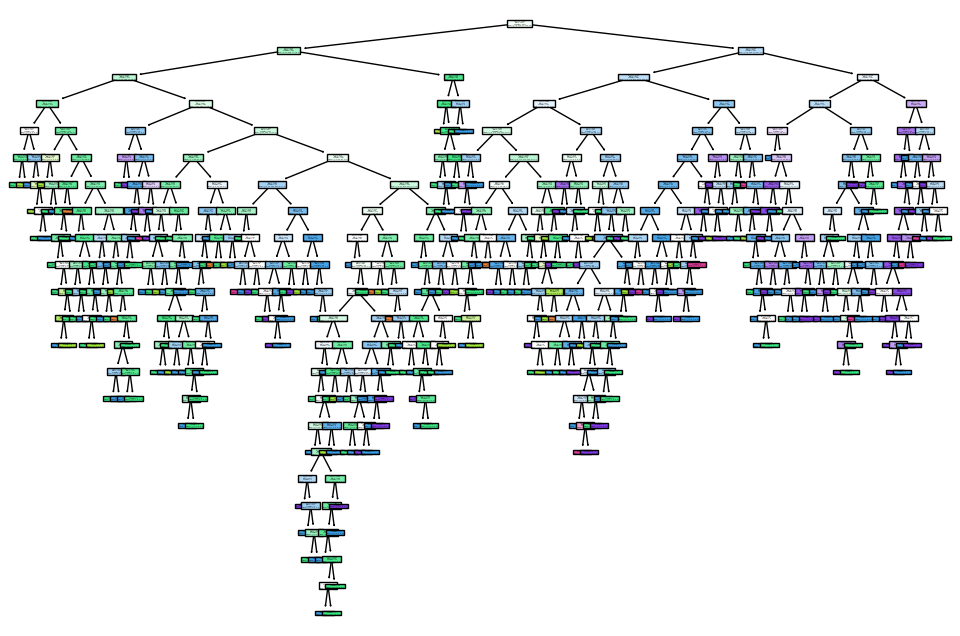

In [120]:
# Imagen del árbol del modelo 1

plt.figure(figsize=(12,8))
plot_tree(modelo, filled=True)
plt.show()

# Gráficos del modelo 3 que fue aquel que mejores resultados ofreció

In [175]:
# Matriz de confusión

conf_matrix = confusion_matrix(Y_test, prediccion3)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[ 0  0  2  0  0  0]
 [ 0  0  4  7  0  0]
 [ 0  0 89 27  0  0]
 [ 0  0 25 74  8  0]
 [ 0  0  3 18 12  0]
 [ 0  0  0  0  3  0]]


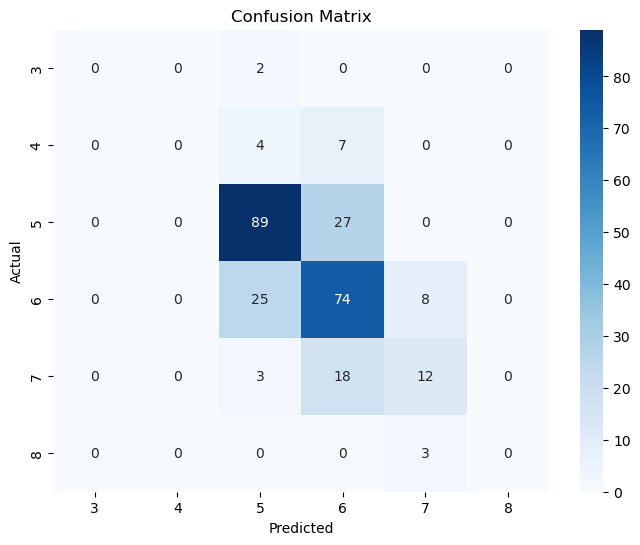

In [201]:
# Visualizar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(prediccion), yticklabels=set(Y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()